# RNN

Este es nuestro segundo proyecto. En este proyecto, gran parte del código ya está implementado. No debes modificar el código donde no es necesario. Recuerda leer las instrucciones. 

Este proyecto tiene dos partes
* Predicción de series de tiempo
* Generación de secuencias

## Parte 1. Predicción de series de tiempo

El objetivo es utilizar una RNN para crear un regresor. En particular, nuestro objetivo será predecir las acciones de Apple con siete días de antelación. El objetivo de esta parte es aprender a utilizar un RNN con Keras. Utilizaremos LSTMs, las cuales previenen muchos problemas de las RNN comunes.

### 1.1 Cargar información y visualización

Nuestro primer paso es cargar información histórica. Iniciaremos cargando la historia de 140 días del valor de las acciones de Apple. Iniciaremos haciendo algunos pasos de preprocesamiento para preparar la información al modelo de RNN. 

El primer paso, y buena práctica, es normalizar la información. Esto previene problemas comunes con las funciones de activación cuyas transformaciones pueden dar números muy grandes. Adicionalmente, facilita al modelo el cálculo de las derivadas. En este problema normalizaremos para que todos los valores estén entre 0 y 1, inclusive, pero ten en cuenta que hay otras maneras de normalizar. El archivo apple_normalized ya hace ese paso.

https://en.wikipedia.org/wiki/Normalization_(statistics)

In [1]:
### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### load in and normalize the dataset
dataset = np.loadtxt('data/apple_normalized.csv')

Text(0,0.5,'normalized series value')

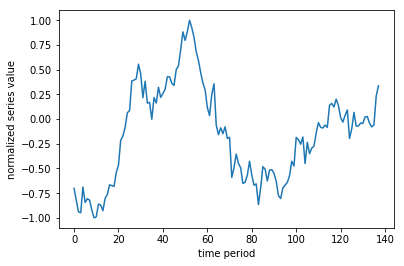

In [2]:
# Veremos cómo se comporta el valor en la serie
plt.plot(dataset)
plt.xlabel('time period')
plt.ylabel('normalized series value')

### 1.2  Separar nuestra serie de tiempo en secuencias

Una serie de tiempo es una secuencia de números que se puede representar así:

$$s_{0},s_{1},s_{2},...,s_{P}$$

donde $s_{p}$ es el valor numérico de la serie de tiempo en el periodo $p$ y donde $P$ es la longitud de la serie. Para poder utilizar una RNN, debemos tratar el problema de predicción de series de tiempo como un problema de regresión. Para esto, necesitamos tener una ventana que se deslice por la serie para construir un conjunto de pares de entrada y salida. Este proceso se ve en el siguiente gif:

![imagen](https://github.com/udacity/aind2-rnn/blob/master/images/timeseries_windowing_training.gif?raw=true)

Por ejemplo, utilizando un window de 5, produciríamos un conjunto de pares como en la siguiente tabla:

$$\begin{array}{c|c}
\text{Entrada} & \text{Salida}\\
\hline \color{CornflowerBlue} {\langle s_{1},s_{2},s_{3},s_{4},s_{5}\rangle} & \color{Goldenrod}{ s_{6}} \\
\ \color{CornflowerBlue} {\langle s_{2},s_{3},s_{4},s_{5},s_{6} \rangle } & \color{Goldenrod} {s_{7} } \\
\color{CornflowerBlue}  {\vdots} & \color{Goldenrod} {\vdots}\\
\color{CornflowerBlue} { \langle s_{P-5},s_{P-4},s_{P-3},s_{P-2},s_{P-1} \rangle } & \color{Goldenrod} {s_{P}}
\end{array}$$

Recuerda que el vector de entrada es de tamaño 4 y que el de salida es un escalar. También, fíjate cómo dada una serie de tiempo de tamaño P y con un tamaño de ventana T = 5, creamos P - 5 pares. Generalizando, podemos crear P - T pares.

 Implement the function called window_transform_series in my_answers.py so that it runs a sliding window along the input series and creates associated input/output pairs. Note that this function should input a) the series and b) the window length, and return the input/output subsequences. Make sure to format returned input/output as generally shown in table above (where window_size = 5), and make sure your returned input is a numpy array.
 
**TODO** Es hora de escribir código. Implementa una función llamada window_transform_series. Esta función debe correr una ventana que se deslice por los pares de input/output. Esta función debe tomar como entrada una serie y el tamaño T de la ventana. A su vez, la función debe regresar una lista con los vectores de entrada y otra lista con los escalares de salida. Asegúrate que el formato sea como arriba y que el valor regresado sea un arreglo de numpy. No veas la solución directamente. 

Puedes probar tu función con las dos siguientes celdas

In [8]:
odd_nums = np.array([1,3,5,7,9,11,13])
# Esperaríamos 
# X = [[1 3] [3 5] ... [9 11]]
# y = [5 7 ... 13]

In [9]:
# corremos una ventana con tamaño 2
window_size = 2
X,y = window_transform_series(odd_nums, window_size)

print ('--- the input X will look like ----')
print (X)

print ('--- the associated output y will look like ----')
print (y)

print ('the shape of X is ' + str(np.shape(X)))
print ('the shape of y is ' + str(np.shape(y)))
print('the type of X is ' + str(type(X)))
print('the type of y is ' + str(type(y)))

--- the input X will look like ----
[[ 1  3]
 [ 3  5]
 [ 5  7]
 [ 7  9]
 [ 9 11]]
--- the associated output y will look like ----
[[ 5]
 [ 7]
 [ 9]
 [11]
 [13]]
the shape of X is (5, 2)
the shape of y is (5, 1)
the type of X is <class 'numpy.ndarray'>
the type of y is <class 'numpy.ndarray'>


In [10]:
### TODO: llena la siguiente función.
def window_transform_series(series, window_size):
    """
    Implementa la función para la ventana que se desliza. Toma tu tiempo para este problema
    y no veas la solución inmediatamente. Piensa en el vector de ejemplo. La función debería
    ser entre 10 y 30 líneas, pero asegúrate de escribir un algoritmo que entiendas.
    
    series: Una lista con todos los elementos.
    window_size: El tamaño de la ventana
    
    Tips: 
        Piensa cómo recorrer P-T elementos y cómo ir agregando los elementos a la lista.
        Al final convertí los resultados a np array y convertí y a un vector columna
    """
    # containers for input/output pairs
    X = []
    y = []
    
    # From 0 to p-t
    for i in range(len(series) - window_size):  
        inp = []
        
        # Pick next window_size elems
        for j in range(i, i + window_size):
            inp.append(series[j])
            
        # Add input and output
        X.append(inp)
        y.append(series[i+window_size])
    
    X = np.asarray(X)
    y = np.asarray(y)
    y.shape = (len(y),1)
    
    return X, y

In [11]:
window_size = 7
X,y = window_transform_series(series = dataset, window_size = window_size)

### 1.3 Separar en training y testing set

Para mantenerlo sencillo, usaremos 33% del dataset para testing. Cuando el modelo esté entrenado, veremos su precisión en el testing set. Normalmente, separaríamos la información de manera aleatoria para un modelo de regresión. Aquí no haremos esto. ¿Por qué? En este caso, nuestros pares están relacionados temporalmente. No podemos validar nuestro modelo entrenándolo en un conjunto aleatorio de la serie y luego probándolo en otro. Queremos entrenar el modelo en un periodo de la serie y validarlo en otro periodo.

In [12]:
# separamos en training y testing
train_test_split = int(np.ceil(2*len(y)/float(3)))   # split point

# obtenemos train set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# obtenemos test set
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: Para usar LSTM, nuestro input debe ser modificado a [samples, window_size, stepsize]
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

### 1.4 Contruir la red neuronal con RNN

Ya teniendo nuestros pares de la serie con la función que implementaste y con los conjuntos de training y testing, podemos crear la red neuronal. Utilizaremos Keras para construir una pequeña red neuronal de do scapas:
* Capa 1: Usa un módulo LSTM con 5 hidden units. Nota que el input_shape=(window_size, 1)
* Capa 2: Usa una capa completamente conectada con una unidad

Revisa
- https://keras.io/layers/recurrent/
- https://keras.io/optimizers/

In [13]:
### TODO: create required RNN model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# TODO: construye una RNN para hacer regresión en nuestra serie de tiempo con entrada/salida. Son 3 líneas de código.
# Recuerda usar LSTM, no RNN. Sólo son dos parámetros - unidades e input_shape
model = Sequential()
model.add(LSTM(5, input_shape=(window_size, 1)))
model.add(Dense(1))

# podemos configurar el optimizador por separado para especificar todos sus argumentos
# https://keras.io/optimizers/ Revisa sus parámetros
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

Using TensorFlow backend.


In [14]:
# run your model!
model.fit(X_train, y_train, epochs=1000, batch_size=50, verbose=0)

### 1.5 Revisamos Desempeño del modelo
Si todo funciona bien, se espera un error menor a 0.02. Si cualquiera de los dos errores es menor, cambia el número de epochs (1000 debería ser suficiente) o cambia el batch_size.

In [15]:
# Evaluamos el modelo para training y testing.
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.0152027227662
testing error = 0.0144876254463


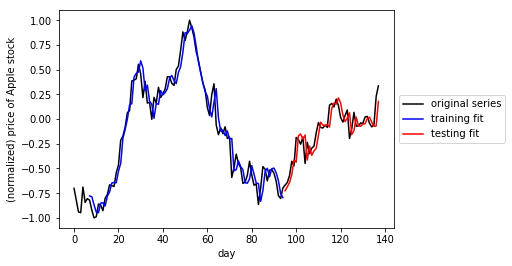

In [28]:
### Plot everything - the original series as well as predictions on training and testing sets
import matplotlib.pyplot as plt
%matplotlib inline

# predict in x and y
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# plot original series
plt.plot(dataset,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Parte 2. Generador de Secuencias

### 2.1 Inicio
En esta parte implementaras una RNN que escriba secuencias de inglés que escriba oraciones relativamente coherentes desde nada. Este modelo construirá las secuencias caracter por caracter. Esto requerirá ajustar muchos parámetros en el cuerpo de palabras de entrenamiento. Utilizaremos la versión completa de las aventuras de Sherlock Holmes para entrenar.

Aunque es una tarea completamente diferente, el proceso es muy similar. Podemos enseñar al modelo a aprender patrones de entradas y salidas a partir de muchos ejemplos. Cada entrada es un string como el siguiente:

dogs are grea

mientras que su salida correspondiente es el siguiente caracter de la secuencia ('t'). Para que las predicciones sean razonables, el modelo debe ver muchos ejemplos. El programa funcionará más o menos así:

* http://www.cs.toronto.edu/~ilya/rnn.html

Esto es usado por bots en twitter y hay un concurso anual de modelos que generan novelas de más de 50,000 palabras (https://github.com/NaNoGenMo/2016).


### 2.2 Preprocesamos el dataset

La primera tarea es cargar un corpus para usar en el entrenamiento y hacer una serie de tareas. Podrías usar cualquier cuerpo de 100,000 caracteres o más, pero aquí usaremos el libro de Sherlock.

In [17]:
# leemos y convertimos a minúsculas
text = open('data/holmes.txt').read().lower()
print('our original text has ' + str(len(text)) + ' characters')

our original text has 581862 characters


Vamos a examinar el texto. Sólo nos interesa entrenar a partir de palabras válidas en inglés. Es decir, podemos eliminar cualquier caracter que no sea parte de palabras en inglés.

In [19]:
text[:2000]

"project gutenberg's the adventures of sherlock holmes, by arthur conan doyle\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.net\n\n\ntitle: the adventures of sherlock holmes\n\nauthor: arthur conan doyle\n\nposting date: april 18, 2011 [ebook #1661]\nfirst posted: november 29, 2002\n\nlanguage: english\n\n\n*** start of this project gutenberg ebook the adventures of sherlock holmes ***\n\n\n\n\nproduced by an anonymous project gutenberg volunteer and jose menendez\n\n\n\n\n\n\n\n\n\nthe adventures of sherlock holmes\n\nby\n\nsir arthur conan doyle\n\n\n\n   i. a scandal in bohemia\n  ii. the red-headed league\n iii. a case of identity\n  iv. the boscombe valley mystery\n   v. the five orange pips\n  vi. the man with the twisted lip\n vii. the adventure of the blue carbuncle\nviii. the

Claramente hay mucha basura que no nos sirve y podemos quitar. Como los primeros caracteres contienen la tabla de contenido, el título y otras cosas que no nos importan, quitaremos los primeros caracteres. También remplazaremos los \n con espacios vacíos.

In [20]:
text = text[1302:]
text = text.replace('\n',' ')    # replacing '\n' with '' simply removes the sequence
text = text.replace('\r',' ')

In [21]:
text[:1000]

"s eyes she eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. he was, i take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. he never spoke of the softer passions, save with a gibe and a sneer. they were admirable things for the observer--excellent for drawing the veil from men's motives and actions. but for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not be more disturbing than a strong emotion in a nature such as his. and yet there was but one woman to him, and that woman was the late irene ad

Sólo nos quedaremos con letras y algunos símbolos de puntuación

In [23]:
import string

allowed_chars = string.ascii_lowercase + ' ' + '!' + ',' + '.' + ':' + ';' + '?'

# remove as many non-english characters and character sequences as you can 
for char in text:
    if char not in allowed_chars:
        text = text.replace(char, ' ')

# shorten any extra dead space created above
text = text.replace('  ',' ')

In [24]:
text[:1000]

's eyes she eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. he was, i take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. he never spoke of the softer passions, save with a gibe and a sneer. they were admirable things for the observer excellent for drawing the veil from men s motives and actions. but for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. grit in a sensitive instrument, or a crack in one of his own high power lenses, would not be more disturbing than a strong emotion in a nature such as his. and yet there was but one woman to him, and that woman was the late irene adl

In [26]:
chars = sorted(list(set(text)))

# print some of the text, as well as statistics
print ("this corpus has " +  str(len(text)) + " total number of characters")
print ("this corpus has " +  str(len(chars)) + " unique characters")

this corpus has 570916 total number of characters
this corpus has 33 unique characters


### 2.3 Separamos data en pares

Al igual que antes, vamos a crear un conjunto de pares de entrada y salida para que el modelo pueda entrenarse. En la primera parte implementaste una ventana que se deslica en una serie de tiempo y extrae los pares. Aquí haremos lo mismo. Tendremos una ventana dde tamaño $T$ que se deslizará por el enorme corpus. Lo que está en la ventana es el input y el siguiente caracter es su output correspondiente. Aquí hay un ejemplo de T = 5.

![imagen](https://github.com/udacity/aind2-rnn/blob/master/images/text_windowing.gif?raw=true)

Nota que aquí, aunque tenemos una ventana, no es exactamente igual - la ventana no se desliza un caracter a la vez, sino que se mueve en un step definido $M$. Esto se hace en entradas largas de texto porque sino habría demasiados pares de entradas y salidas. 

Podemos definir el corpus como:

$$s_{0},s_{1},s_{2},...,s_{P}$$
donde $P$ es el tamaño del texto (aprox 500,000). Tenemos una ventana de tamaño T = 5 y con un paso de M = 1. Eso produce los siguientes pares

$$\begin{array}{c|c}
\text{Input} &amp; \text{Output}\\
\hline \color{CornflowerBlue} {\langle s_{1},s_{2},s_{3},s_{4},s_{5}\rangle} &amp; \color{Goldenrod}{ s_{6}} \\
\ \color{CornflowerBlue} {\langle s_{2},s_{3},s_{4},s_{5},s_{6} \rangle } &amp; \color{Goldenrod} {s_{7} } \\
\color{CornflowerBlue}  {\vdots} &amp; \color{Goldenrod} {\vdots}\\
\color{CornflowerBlue} { \langle s_{P-5},s_{P-4},s_{P-3},s_{P-2},s_{P-1} \rangle } &amp; \color{Goldenrod} {s_{P}}
\end{array}$$

Mira que cada entrada es una secuencia de 5 caracteres y que el output es un caracter. Normalmente, dada una M, creamos ceil(P/M) pares aproximadamente.

**TODO**: Crea una función similar a la de la parte 1. En esta función, se debe correr una ventana y generar sus pares asociados. Esta función recibe el texto, el tamaño de la ventana y el step size. En este caso, el valor que regresan deben ser listas, no arreglos de numpy.

In [31]:
### TODO: fill out the function below that transforms the input text and window-size into a set of input/output pairs for use with our RNN model
def window_transform_text(text,window_size,step_size):
    # containers for input/output pairs
    inputs = []
    outputs = []
    ctr = 0
    
    # TODO: Revisa los parámetros de range de python. Se puede hacer en un for con 3 líneas.
    for i in range(window_size, len(text), step_size):
        inputs.append(text[ctr:i])
        outputs.append(text[i])
        ctr = ctr + step_size
    
    return inputs, outputs

In [32]:
window_size = 100
step_size = 5
inputs, outputs = window_transform_text(text,window_size,step_size)

In [33]:
# print out a few of the input/output pairs to verify that we've made the right kind of stuff to learn from
print('input = ' + inputs[2])
print('output = ' + outputs[2])
print('--------------')
print('input = ' + inputs[100])
print('output = ' + outputs[100])

input =  eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love fo
output = r
--------------
input = r excellent for drawing the veil from men s motives and actions. but for the trained reasoner to adm
output = i


### 2.4 Revisión del problema

El problema de predicción de series de tiempo era un problema de regresión porque el output era una valor continuo. Aquí, generamos caracter por caracter. Este es un valor discreto, por lo que estamos hablando de un problema de clasificación. ¿Cuántas clases tenemos? El número de caracteres únicos que podemos predecir.

In [35]:
chars = sorted(list(set(text)))
print ("this corpus has " +  str(len(chars)) + " unique characters")
print ('and these characters are ')
print (chars)

this corpus has 33 unique characters
and these characters are 
[' ', '!', ',', '.', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


El único problema aquí es que necesitamos datos numéricos, por lo que debemos transformar los caracteres. La manera más sencilla es con one-hot encoding como lo hemos hecho en otros problemas. 


$$a\longleftarrow\left[\begin{array}{c}
1\\
0\\
0\\
\vdots\\
0\\
0
\end{array}\right]\,\,\,\,\,\,\,b\longleftarrow\left[\begin{array}{c}
0\\
1\\
0\\
\vdots\\
0\\
0
\end{array}\right]\,\,\,\,\,c\longleftarrow\left[\begin{array}{c}
0\\
0\\
1\\
\vdots\\
0\\
0 
\end{array}\right]\cdots$$

cada vector tendrá 32 entradas.

In [36]:
# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

In [37]:
# transform character-based input/output into equivalent numerical versions
def encode_io_pairs(text,window_size,step_size):
    # number of unique chars
    chars = sorted(list(set(text)))
    num_chars = len(chars)
    
    # cut up text into character input/output pairs
    inputs, outputs = window_transform_text(text,window_size,step_size)
    
    # create empty vessels for one-hot encoded input/output
    X = np.zeros((len(inputs), window_size, num_chars), dtype=np.bool)
    y = np.zeros((len(inputs), num_chars), dtype=np.bool)
    
    # loop over inputs/outputs and tranform and store in X/y
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            X[i, t, chars_to_indices[char]] = 1
        y[i, chars_to_indices[outputs[i]]] = 1
        
    return X,y

In [38]:
window_size = 100
step_size = 5
X, y = encode_io_pairs(text, window_size, step_size)

### 2.5. Configurando nuestra RNN

Ahora, al igual que antes, construiremos nuestra RNN. Esta vez, la red neuronal será:
* Capa 1: Un módulo LSTM con 200 unidades ocultas. Nota que input_shape=(window_size,len(unique_chars))
* Capa 2: Capa completamente conectada con len(unique_chars) unidades ocultas (es la capa de salida) activada con softmax.

In [39]:
### necessary functions from the keras library
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import keras
import random

# TODO build the required RNN model: a single LSTM hidden layer with softmax activation, categorical_crossentropy loss 
model = Sequential()
model.add(LSTM(200, input_shape=(window_size, 33)))
model.add(Dense(33, activation='softmax'))

# initialize optimizer
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile model --> make sure initialized optimizer and callbacks - as defined above - are used
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [40]:
# a small subset of our input/output pairs
Xsmall = X[:10000,:,:]
ysmall = y[:10000,:]

In [49]:
# Nota que normalmente haríamos 50 a 100 iteraciones
model.fit(Xsmall, ysmall, batch_size=500, epochs=30,verbose = 1)

# save weights
model.save_weights('best_RNN_small_textdata_weights.hdf5')

Epoch 1/30
10000/10000 [==============================] - 47s 5ms/step - loss: 2.3744
Epoch 2/30
10000/10000 [==============================] - 50s 5ms/step - loss: 2.3385
Epoch 3/30
10000/10000 [==============================] - 48s 5ms/step - loss: 2.3047
Epoch 4/30
10000/10000 [==============================] - 47s 5ms/step - loss: 2.2740
Epoch 5/30
10000/10000 [==============================] - 46s 5ms/step - loss: 2.2434
Epoch 6/30
10000/10000 [==============================] - 43s 4ms/step - loss: 2.2222
Epoch 7/30
10000/10000 [==============================] - 45s 4ms/step - loss: 2.1976
Epoch 8/30
10000/10000 [==============================] - 40s 4ms/step - loss: 2.1706
Epoch 9/30
10000/10000 [==============================] - 40s 4ms/step - loss: 2.1547
Epoch 10/30
10000/10000 [==============================] - 40s 4ms/step - loss: 2.1309
Epoch 11/30
10000/10000 [==============================] - 58s 6ms/step - loss: 2.1110
Epoch 12/30
10000/10000 [===========================

¿Cómo podemos predecir a partir del modelo?

Primero, predecimos el siguiente caracter dado un conjunto de caracteres cuyo tamaño es el mismo que el de la ventana. Luego, quitamos el primer caracter de la entrada y agregamos la predicción. Esta es nuestra nueva secuencia que podemos usar como entrada. Repetimos este proceso N veces para conseguir N predicciones. 

En la siguiente celda hay una función que hace eso.

In [50]:
# function that uses trained model to predict a desired number of future characters
def predict_next_chars(model, input_chars, num_to_predict):     
    predicted_chars = ''
    
    for i in range(num_to_predict):
        # convierte entrada a números  
        x_test = np.zeros((1, window_size, len(chars)))
        for t, char in enumerate(input_chars):
            x_test[0, t, chars_to_indices[char]] = 1.

        # predice en esta iteración
        test_predict = model.predict(x_test,verbose = 0)[0]

        # convierte predicción a caracter
        r = np.argmax(test_predict)                           # predict class of each test input
        d = indices_to_chars[r] 

        # agrega nuevo caracter y quita el primero
        predicted_chars+=d
        input_chars+=d
        input_chars = input_chars[1:]
    return predicted_chars

In [51]:
start_inds = [0, 500, 1000]

# cargamos pesos
model.load_weights('best_RNN_small_textdata_weights.hdf5')

for s in start_inds:
    start_index = s
    input_chars = text[start_index: start_index + window_size]

    # usa la función que utilizamos
    predict_input = predict_next_chars(model, input_chars, num_to_predict = 100)

    # print out input characters
    print('------------------')
    input_line = 'input chars = ' + '\n' +  input_chars + '"' + '\n'
    print(input_line)

    # print out predicted characters
    line = 'predicted chars = ' + '\n' +  predict_input + '"' + '\n'
    print(line)

------------------
input chars = 
s eyes she eclipses and predominates the whole of her sex. it was not that he felt any emotion akin "

predicted chars = 
to the ristere sofres and a dout not the rioust and the sin the chand a d an the the siof the cante "

------------------
input chars = 
r excellent for drawing the veil from men s motives and actions. but for the trained reasoner to adm"

predicted chars = 
erithen the sineres formes and i the late to the sare the past and the singered and the care in the "

------------------
input chars = 
r, of dubious and questionable memory. i had seen little of holmes lately. my marriage had drifted u"

predicted chars = 
pte the the chas in the bant of the caster and a dint the routher and a dor the lome sor comen the c"



Se ve aceptable, pero no tiene mucho sentido. Intentemos con un conjunto más grande de datos. Configurar los parámetros de un RNN para un problema grande como este normalmente requiere un GPU para acelerar el proceso por 10. Como el entrenamiento tarda mucho, se sugiere que escribas cada output de cada paso a un archivo. De esta manera, aunque ya no tengas el cuaderno abierto, podrás ver los resultados en el procesamiento. Esta configuración se hace así.

In [44]:
### A simple way to write output to file
f = open('my_test_output.txt', 'w')              # create an output file to write too
f.write('this is only a test ' + '\n')           # print some output text
x = 2
f.write('the value of x is ' + str(x) + '\n')    # record a variable value
f.close()     

# print out the contents of my_test_output.txt
f = open('my_test_output.txt', 'r')              # create an output file to write too
f.read()

'this is only a test \nthe value of x is 2\n'

In [ ]:
# No corras esta celda
# Aquí utilizamos más caracteres. Aquí cada iteración se tardará 10-20 minutos, por lo que no te sugiero apenas que
# quieras dejarlo en la noche corriendo.
Xlarge = X[:100000,:,:]
ylarge = y[:100000,:]

# TODO: fit to our larger dataset
model.fit(Xlarge, ylarge, batch_size=500, nb_epoch=30,verbose = 1)

# save weights
model.save_weights('best_RNN_large_textdata_weights.hdf5')

In [ ]:
start_inds = [0, 500, 1000]

# save output
f = open('RNN_large_textdata_output.txt', 'w')  # create an output file to write too

# load weights
model.load_weights('model_weights/best_RNN_large_textdata_weights.hdf5')
for s in start_inds:
    start_index = s
    input_chars = text[start_index: start_index + window_size]

    # use the prediction function
    predict_input = predict_next_chars(model,input_chars,num_to_predict = 100)

    # print out input characters
    line = '-------------------' + '\n'
    print(line)
    f.write(line)

    input_line = 'input chars = ' + '\n' +  input_chars + '"' + '\n'
    print(input_line)
    f.write(input_line)

    # print out predicted characters
    predict_line = 'predicted chars = ' + '\n' +  predict_input + '"' + '\n'
    print(predict_line)
    f.write(predict_line)
f.close()